In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from config import api_key
import numpy as np
import requests
from citipy import citipy
import time


In [27]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [29]:
# Save config information.
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "Imperial"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [30]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=havelock
Processing Record 2 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=hilo
Processing Record 3 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=aksarka
Processing Record 4 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=arraial%20do%20cabo
Processing Record 5 | Vite
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=vite
Processing Record 6 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=faya
Processing Record 7 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 57 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=eureka
Processing Record 58 | Abu Samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=abu%20samrah
Processing Record 59 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=mataura
Processing Record 60 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=kaitangata
Processing Record 61 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=nikolskoye
Processing Record 62 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=padang
Processing Record 63 | Shieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q

Processing Record 112 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=grand%20gaube
Processing Record 113 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=henties%20bay
Processing Record 114 | Mersing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=mersing
Processing Record 115 | Bar Harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=bar%20harbor
Processing Record 116 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=ixtapa
Processing Record 117 | Funes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=funes
Processing Record 118 | Warwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135

Processing Record 168 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=geraldton
Processing Record 169 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=cayenne
Processing Record 170 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=tasiilaq
Processing Record 171 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=vestmanna
Processing Record 172 | Lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=lasa
City not found. Skipping...
Processing Record 173 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=makakilo%20city
Processing Record 174 | Vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 224 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=nabire
Processing Record 225 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=kavaratti
Processing Record 226 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=yulara
Processing Record 227 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=sur
Processing Record 228 | Shu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=shu
Processing Record 229 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=broome
Processing Record 230 | Loandjili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=loandjili
Processing Re

Processing Record 280 | Odienne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=odienne
City not found. Skipping...
Processing Record 281 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=trairi
Processing Record 282 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=esperance
Processing Record 283 | Katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=katobu
Processing Record 284 | Voznesenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=voznesenskoye
Processing Record 285 | Vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=vaitape
Processing Record 286 | Charlestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 335 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=husavik
Processing Record 336 | Moree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=moree
Processing Record 337 | Abu Zabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=abu%20zabad
Processing Record 338 | Caarapo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=caarapo
Processing Record 339 | Toamasina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=toamasina
Processing Record 340 | Kantang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=kantang
Processing Record 341 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f

Processing Record 389 | Alekseyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=alekseyevka
Processing Record 390 | Baiyin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=baiyin
Processing Record 391 | Mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=mahon
City not found. Skipping...
Processing Record 392 | Non Thai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=non%20thai
Processing Record 393 | Cascais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=cascais
City not found. Skipping...
City not found. Skipping...
Processing Record 394 | Zhuanghe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=zhuanghe
Processing Record 395 | North Myrtle Beach
http://

Processing Record 444 | Amboise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=amboise
Processing Record 445 | Kouvaras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=kouvaras
Processing Record 446 | Ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=ulaanbaatar
Processing Record 447 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=mahebourg
Processing Record 448 | Gweru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=gweru
Processing Record 449 | Derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=derzhavinsk
Processing Record 450 | Oyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c

Processing Record 498 | Sadat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=sadat
Processing Record 499 | Demba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=demba
Processing Record 500 | Kefamenanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=kefamenanu
Processing Record 501 | Nekhayevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=nekhayevskiy
Processing Record 502 | Concepcion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=concepcion
City not found. Skipping...
Processing Record 503 | Aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=aripuana
Processing Record 504 | Brownsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 554 | Boyuibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=boyuibe
Processing Record 555 | Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=gat
City not found. Skipping...
Processing Record 556 | Miles City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=miles%20city
Processing Record 557 | Drayton Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=drayton%20valley
Processing Record 558 | Erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9d309a2c6ff378e4135cc0f0c3c06f4&q=erzin


In [31]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [33]:
# Save data frame to CSV
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Havelock,20,US,1567647210,88,34.88,-76.90,81.00,6.93
1,Hilo,90,US,1567647211,66,19.71,-155.08,84.20,5.82
2,Aksarka,10,RU,1567647213,82,66.56,67.80,52.08,11.63
3,Arraial do Cabo,100,BR,1567647214,94,-22.97,-42.02,69.27,12.17
4,Vite,75,ES,1567647215,87,42.89,-8.54,64.99,13.87


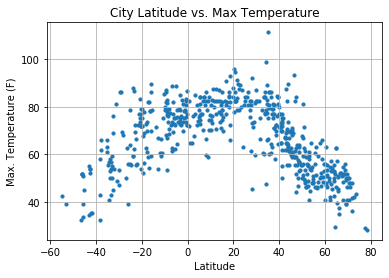

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png", encoding="utf-8", index=False)


# Show plot
plt.show()

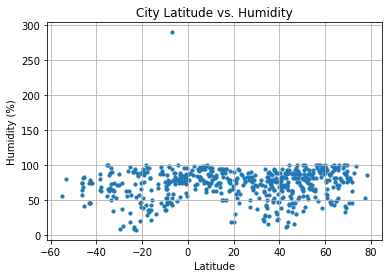

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png", encoding="utf-8", index=False)

# Show plot
plt.show()


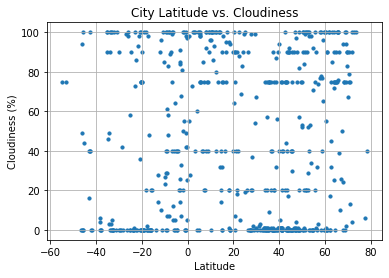

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png", encoding="utf-8", index=False)

# Show plot
plt.show()


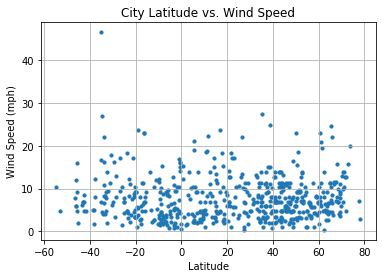

In [38]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png", encoding="utf-8", index=False)

# Show plot
plt.show()